<a href="https://colab.research.google.com/github/in-seixas/in-seixas_data_science-/blob/master/PepBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
os.chdir('/content/gdrive/My Drive')

In [ ]:
os.listdir()

['master.csv',
 'DistribuicaoCloroquinaOseltamivir.xlsx',
 'Colab Notebooks',
 'modelo_de_relatorio.pdf',
 '__MACOSX',
 'relatorios',
 'Modulo_3.notebooks',
 'medicamento.txt',
 'Lista de exercícios 7 - Variáveis - Operadores.pdf',
 'controle_da_empresa.xlsx',
 'Pepbase.csv']

In [ ]:
pep = pd.read_csv('/content/gdrive/My Drive/Pepbase.csv', None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
pep.head()

,Unnamed: 0,affinity_measure,affinity_value,ligand_chain,ligand_id,ligand_resid,ligand_smiles,pdb_id,type,apo95_pdb_id
0,0,Ki,4560.0,C,GLY TYR GLU ASN PRO THR TYR LYS PHE PHE,3,O=C(NC(C(=O)NC(C(=O)NC(C(=O)NC(C=O)Cc1ccccc1)C...,1AQC,ligand,NaN
1,1,Kd,90000.0,P,PRO PRO PRO PRO PRO PRO PRO PRO PRO PRO,1,O=C([O-])C1N(C(=O)C2N(C(=O)C3N(C(=O)C4N(C(=O)C...,1AWI,ligand,NaN
2,2,Kd,90000.0,P,PRO PRO PRO PRO PRO PRO PRO PRO PRO PRO,1,O=C([O-])C1N(C(=O)C2N(C(=O)C3N(C(=O)C4N(C(=O)C...,1AWI,ligand,4X25
3,3,Kd,1900.0,B,PRO PRO PRO ALA LEU PRO PRO LYS LYS ARG,1,O=C(NC(CCCC[N+H3])[C-H2])C(NC(=O)C1N(C(=O)C2N(...,1CKA,ligand,NaN
4,4,Kd,25.0,P,SER HIS PHE ASN GLU TYR GLU,1,O=C([O-])C(NC(=O)C(NC(=O)C(NC(=O)C(NC(=O)C(NC(...,1E4W,ligand,NaN


In [ ]:
pep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        189 non-null    int64  
 1   affinity_measure  189 non-null    object 
 2   affinity_value    189 non-null    float64
 3   ligand_chain      189 non-null    object 
 4   ligand_id         189 non-null    object 
 5   ligand_resid      189 non-null    int64  
 6   ligand_smiles     180 non-null    object 
 7   pdb_id            189 non-null    object 
 8   type              189 non-null    object 
 9   apo95_pdb_id      66 non-null     object 
dtypes: float64(1), int64(2), object(7)
memory usage: 14.9+ KB


In [ ]:
afinidade = pep['affinity_measure'].value_counts()

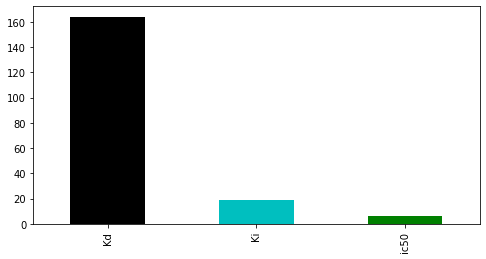

In [ ]:
colors_bar = ['k', 'c', 'g']
plt.figure(figsize=(8,4))
afinidade.plot(kind='bar', color = colors_bar);



In [ ]:
afinidade = dict(pep['affinity_measure'].value_counts())

In [ ]:
!pip install pywaffle




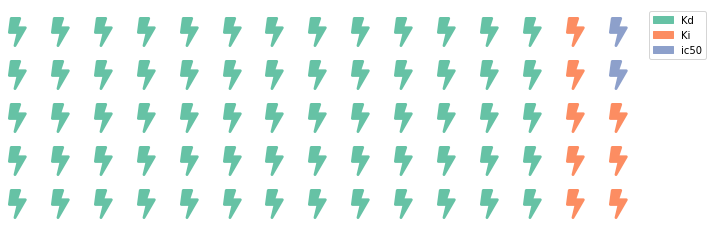

In [ ]:
from pywaffle import Waffle



fig = plt.figure(figsize=(10,6),
                FigureClass=Waffle,
                rows=5,
                columns=15,
                icons='bolt',
                icon_size=30,
                values=afinidade, 
                legend={'loc': 'upper left',
                        'bbox_to_anchor': (1.0, 1)}
               )



plt.show();

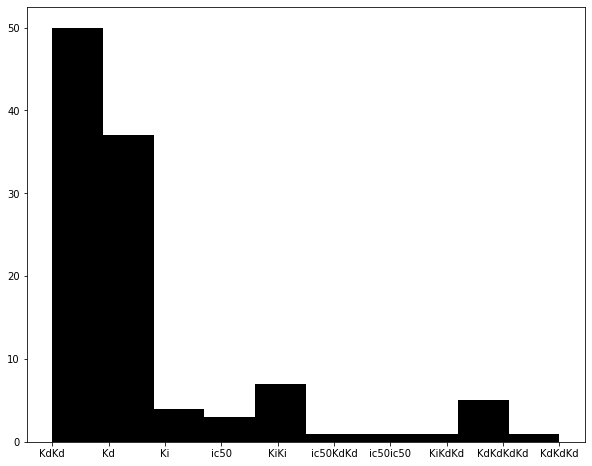

In [ ]:

base = (pep.groupby('affinity_value')['affinity_measure']).sum()
plt.figure(figsize=(10,8))
plt.hist(base,color='k', bins = 10);

In [ ]:
ligação = pep.groupby('pdb_id')['ligand_id'].sum()


In [ ]:
ligação

pdb_id
1AQC              GLY TYR GLU ASN PRO THR TYR LYS PHE PHE
1AWI    PRO PRO PRO PRO PRO PRO PRO PRO PRO PROPRO PRO...
1CKA              PRO PRO PRO ALA LEU PRO PRO LYS LYS ARG
1E4W                          SER HIS PHE ASN GLU TYR GLU
1E4X                          VAL VAL SER HIS PHE ASN ASP
                              ...                        
6BJ3                  ILE PRO LEU THR GLU GLU ALA GLU LEU
6CCU                       PRO HIS ARG VALPRO HIS ARG VAL
6CDG                              PRO GLY LEU TRP LYS SER
6GHJ                               PHE ALA GLNPHE ALA GLN
6HPG    GLY SER LYS MET GLU GLU VAL ASPGLY SER LYS MET...
Name: ligand_id, Length: 123, dtype: object